# Data insights report

## Table of Contents

- Churn Rate Analysis
    - Plot 1: Average Churn Rate by Phone Make Over Time
    - Plot 2.1: Average Churn Rate by Phone Series Over Time (Separated by Make)
    - Plot 2.2: Average ir_rate_monthly by Phone Series Over Time (Separated by Make)
    - Plot 3: Average Churn Rate by Model Age (Months)
    - Churn Rate Analysis Report
- Closing_subs_monthly Analysis
    - Plot 4: Average closing_subs_monthly by Phone Make Over Time  
    - Plot 5: Average closing_subs_monthly by Phone Series Over Time (Separated by Make)
    - Plot 6: closing_subs_monthly VS claims
- Future Work

In [11]:
# Import cleaned dataset
import pandas as pd

df = pd.read_csv("data/cleaned_df.csv")

<br>

---

# Churn Rate Analysis

Definition of Churn Rate: 
- The rate at which customers stop using the particular phone. 

Formula: 
$$
\text{Churn Rate} = \frac{\text{Churn}}{\text{Closing Subs Monthly}}
$$

Rationale for analysing Churn Rate:
- Churn Rate is a critical measure for assessing customer retention. By visualizing trends, we can identify which phone make, phone series etc face higher churn and how these patterns evolve over the years.


## Plot 1: Average Churn Rate by Phone Make Over Time 

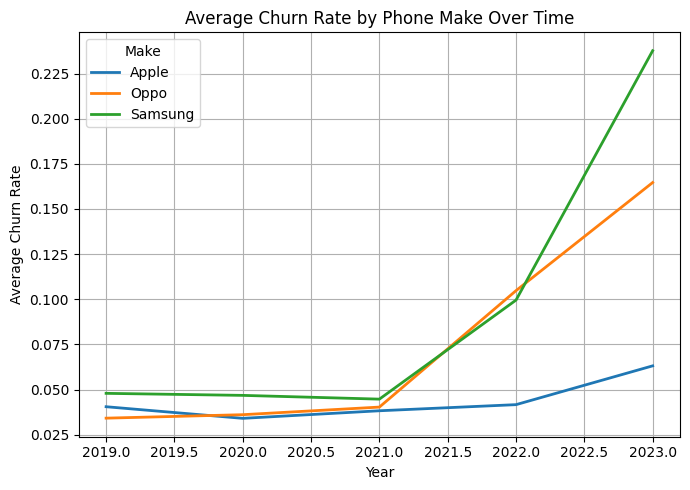

In [12]:
import matplotlib.pyplot as plt

# Convert 'year_month' to datetime and extract 'year'
df['year_month'] = pd.to_datetime(df['year_month'])
df['year'] = df['year_month'].dt.year

# Group by 'year' and 'make', and calculate the average churn rate
agg_df = df.groupby(['year', 'make'], as_index=False)['churn_rate'].mean()

# Initialize the plot
plt.figure(figsize=(7, 5))

# Group by 'make' and plot each group's average churn rate
for make, group in agg_df.groupby('make'):
    plt.plot(group['year'], group['churn_rate'], label=make, linewidth=2)

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Average Churn Rate')
plt.title('Average Churn Rate by Phone Make Over Time')
plt.legend(title='Make')

# Improve aesthetics
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


**_Observations_**
 
On average, we see that the churn rate of all 3 phone brands increases over time. 

## Plot 2.1: Average Churn Rate by Phone Series Over Time (Separated by Make)

In [13]:
# Group by phone_series and calculate the mean churn_rate for each series
churn_by_series = df.groupby('phone_series')['churn_rate'].mean().reset_index()

# Sort by churn_rate
churn_by_series = churn_by_series.sort_values(by='churn_rate', ascending=False)
churn_by_series


,phone_series,churn_rate
21,SAMSUNG GALAXY J4 PLUS 2018,0.592314
20,SAMSUNG GALAXY A10S,0.388338
19,SAMSUNG GALAXY A10,0.346463
17,OPPO A500,0.187854
15,OPPO A3,0.119593
10,IPHONE 7,0.084674
16,OPPO A5,0.082856
22,SAMSUNG GALAXY NOTE 9,0.081280
11,IPHONE X,0.080611
13,IPHONE XS,0.070242


**_Observations_**  
Top 3 phone series with the highest churn rate across 2019 to 2023 belongs to Samsung.

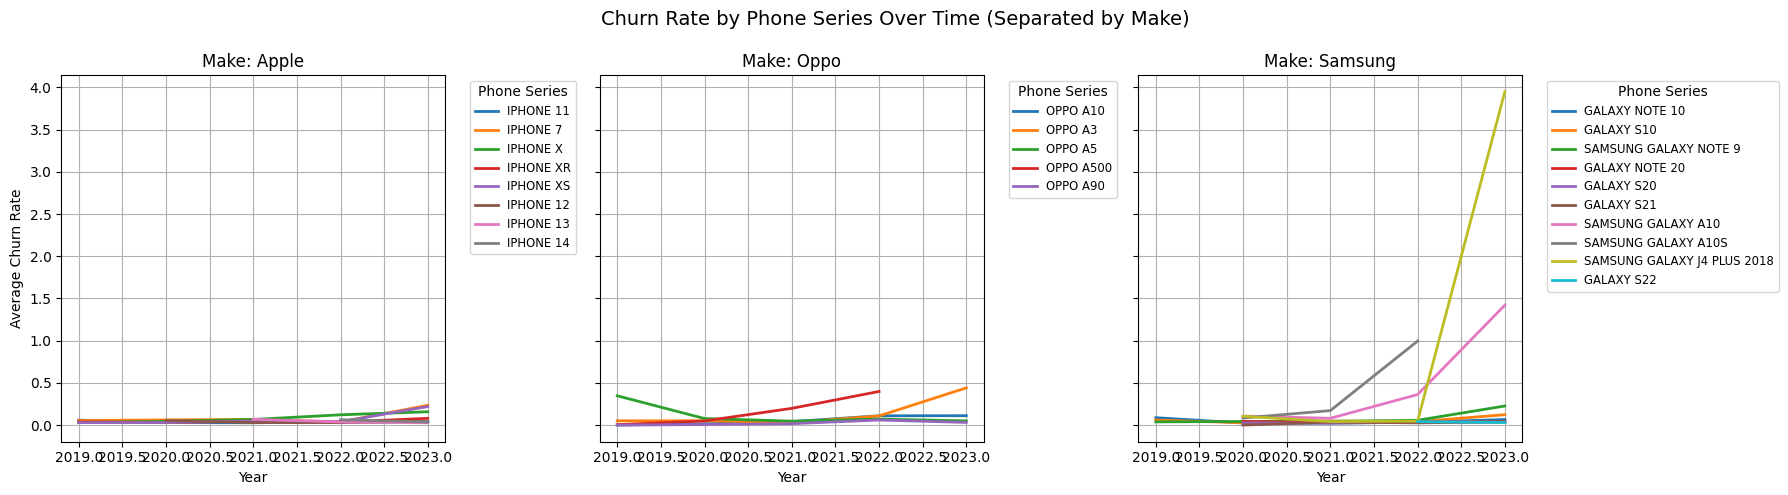

In [14]:
# Group data by 'year', 'make', and 'phone_series', and calculate the average churn rate
churn_by_make_series_year = df.groupby(['make', 'year', 'phone_series'])['churn_rate'].mean().reset_index()

# Get the unique makes in the dataset
unique_makes = churn_by_make_series_year['make'].unique()

# Initialize subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5), sharey=True)
fig.suptitle('Churn Rate by Phone Series Over Time (Separated by Make)', fontsize=14)

# Plot for each make
for i, make in enumerate(unique_makes):
    ax = axes[i]  # Select subplot
    make_data = churn_by_make_series_year[churn_by_make_series_year['make'] == make]
    
    # Plot each phone series for the current make
    for series in make_data['phone_series'].unique():
        series_data = make_data[make_data['phone_series'] == series]
        ax.plot(series_data['year'], series_data['churn_rate'], label=series, linewidth=2)
    
    # Add labels and title for the subplot
    ax.set_title(f"Make: {make}")
    ax.set_xlabel('Year')
    if i == 0:  # Add ylabel only for the first plot
        ax.set_ylabel('Average Churn Rate')
    ax.legend(title='Phone Series', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Adjust the title position
plt.show()

**_Observations_**  

The churn rate for the SAMSUNG GALAXY J4 PLUS 2018 increased significantly from 2022 to 2023.

**_Possible Explanations:_**

- Aging Device:
The SAMSUNG GALAXY J4 PLUS 2018 is an older model launched in 2018. By 2022-2023, the phone may no longer meet performance expectations due to outdated hardware and software, leading to increased customer dissatisfaction and churn.
Older devices often experience performance degradation, battery issues, and lack of software updates, contributing to higher churn.

To investigate further, let's see if the in rate of claims changes across the years.

## Plot 2.2: Average ir_rate_monthly by Phone Series Over Time (Separated by Make)

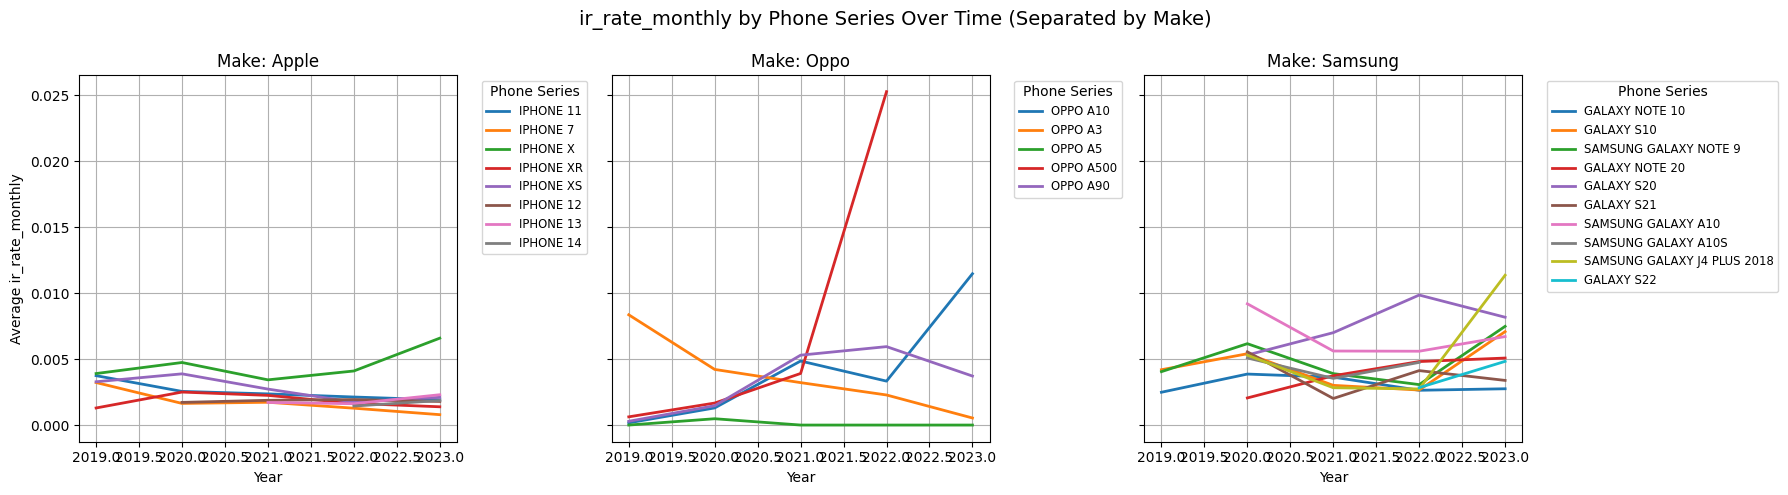

In [15]:
# Group data by 'year', 'make', and 'phone_series', and calculate the average ir_rate_monthly
churn_by_make_series_year = df.groupby(['make', 'year', 'phone_series'])['ir_rate_monthly'].mean().reset_index()

# Get the unique makes in the dataset
unique_makes = churn_by_make_series_year['make'].unique()

# Initialize subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5), sharey=True)
fig.suptitle('ir_rate_monthly by Phone Series Over Time (Separated by Make)', fontsize=14)

# Plot for each make
for i, make in enumerate(unique_makes):
    ax = axes[i]  # Select subplot
    make_data = churn_by_make_series_year[churn_by_make_series_year['make'] == make]
    
    # Plot each phone series for the current make
    for series in make_data['phone_series'].unique():
        series_data = make_data[make_data['phone_series'] == series]
        ax.plot(series_data['year'], series_data['ir_rate_monthly'], label=series, linewidth=2)
    
    # Add labels and title for the subplot
    ax.set_title(f"Make: {make}")
    ax.set_xlabel('Year')
    if i == 0:  # Add ylabel only for the first plot
        ax.set_ylabel('Average ir_rate_monthly')
    ax.legend(title='Phone Series', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Adjust the title position
plt.show()

**_Observations_**

- In the second graph (Make: Oppo), there is a sharp increase in claims in 2022. However, plot 2.1 shows that the corresponding increase in churn rate is not very significant.  
- In the third graph (Make: Samsung), the claims for the SAMSUNG GALAXY J4 PLUS 2018 show a slight increase, but plot 2.1 reveals a notable rise in the churn rate.

**_Insights_**  
A high claims rate does not necessarily translate to a high churn rate. Therefore, models with more claims are not always more likely to be discontinued.

## Plot 3: Average Churn Rate by Model Age (Months)

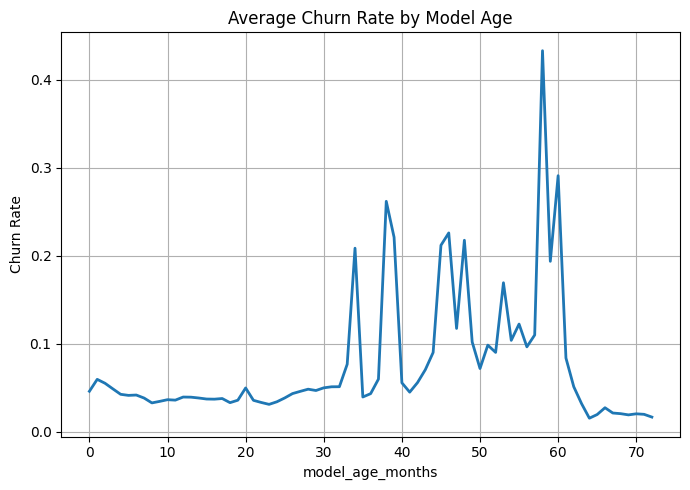

In [16]:
# Group by 'year' and 'make', and calculate the average churn rate
agg_df = df.groupby(['model_age_months'], as_index=False)['churn_rate'].mean()

# Initialize the plot
plt.figure(figsize=(7, 5))

# Group by 'make' and plot each group's average churn rate
plt.plot(agg_df['model_age_months'], agg_df['churn_rate'], linewidth=2)

# Add labels, title, and legend
plt.xlabel('model_age_months')
plt.ylabel('Churn Rate')
plt.title('Average Churn Rate by Model Age')

# Improve aesthetics
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


In [17]:
agg_df = df.groupby(['model_age_months'], as_index=False)['churn_rate'].mean().sort_values(by='churn_rate', ascending=False)
agg_df

,model_age_months,churn_rate
58,58,0.433113
60,60,0.291094
38,38,0.261952
46,46,0.226019
39,39,0.221095
...,...,...
71,71,0.019898
65,65,0.019683
69,69,0.019271
72,72,0.016770


**_Observations_**
- Models aged between 32 to 63 months shows a higher churn rate compared to newer models, although this rate fluctuates. The highest churn rate occurs 58 months after a phone's launch, which is equivalent to 4.8 years.

## Overall Churn Rate Analysis Report

1. **Churn Rate by Phone Make Over Time**
- The churn rate saw an increase in the churn rate of all 3 phone brands increases over time. 

<br> 

2. **Churn Rate by Phone Series Over Time**  
- The **SAMSUNG GALAXY J4 PLUS 2018** series has the highest churn rate, averaging **0.592** from 2019-2023, suggesting customers are discontinuing the models at a higher rate compared to other series.
- On the other hand, the **GALAXY S20** series shows a relatively low churn rate of **0.03**, indicating better retention for this model.

<br> 

3. **Churn Rate by Model Age**  
- Models aged between 32 to 63 months shows a higher churn rate compared to newer models, although this rate fluctuates. The highest churn rate occurs 58 months after a phone's launch, which is equivalent to 4.8 years.

<br>

---

<br>

# Closing_subs_monthly Analysis
Closing_subs_monthly refers to the total number of subscribers or active phone users at the end of a given month.  

## Plot 4: Average closing_subs_monthly by Phone Make Over Time

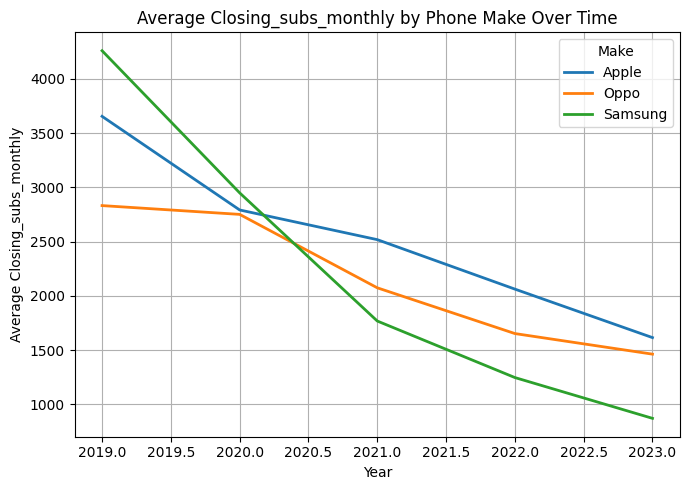

In [18]:
agg_df = df.groupby(['year', 'make'], as_index=False)['closing_subs_monthly'].mean()

# Initialize the plot
plt.figure(figsize=(7, 5))

# Group by 'make' and plot each group's average closing_subs_monthly
for make, group in agg_df.groupby('make'):
    plt.plot(group['year'], group['closing_subs_monthly'], label=make, linewidth=2)

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Average Closing_subs_monthly')
plt.title('Average Closing_subs_monthly by Phone Make Over Time')
plt.legend(title='Make')

# Improve aesthetics
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

**_Observations_**

Overall, there is a noticeable decline in `closing_subs_monthly` across all phone makes (Apple, Oppo, and Samsung) from **2019 to 2023**.

> **Key Insights:**  
> - In **Plot 1**, the **churn rate** for all phone makes shows a consistent **increase** over time.  
> - In **Plot 4**, the **closing_subs_monthly** demonstrates a **decline** for all phone makes across the same period.  
>

This inverse relationship suggests that more users are discontinuing their subscriptions for popular phone brands like **Apple**, **Oppo**, and **Samsung**. A possible explanation could be the increasing adoption of alternative phone brands such as **Huawei**, **Xiaomi**, and **LG**, which might be gaining market share during this period.


## Plot 5: Average closing_subs_monthly by Phone Series Over Time (Separated by Make)

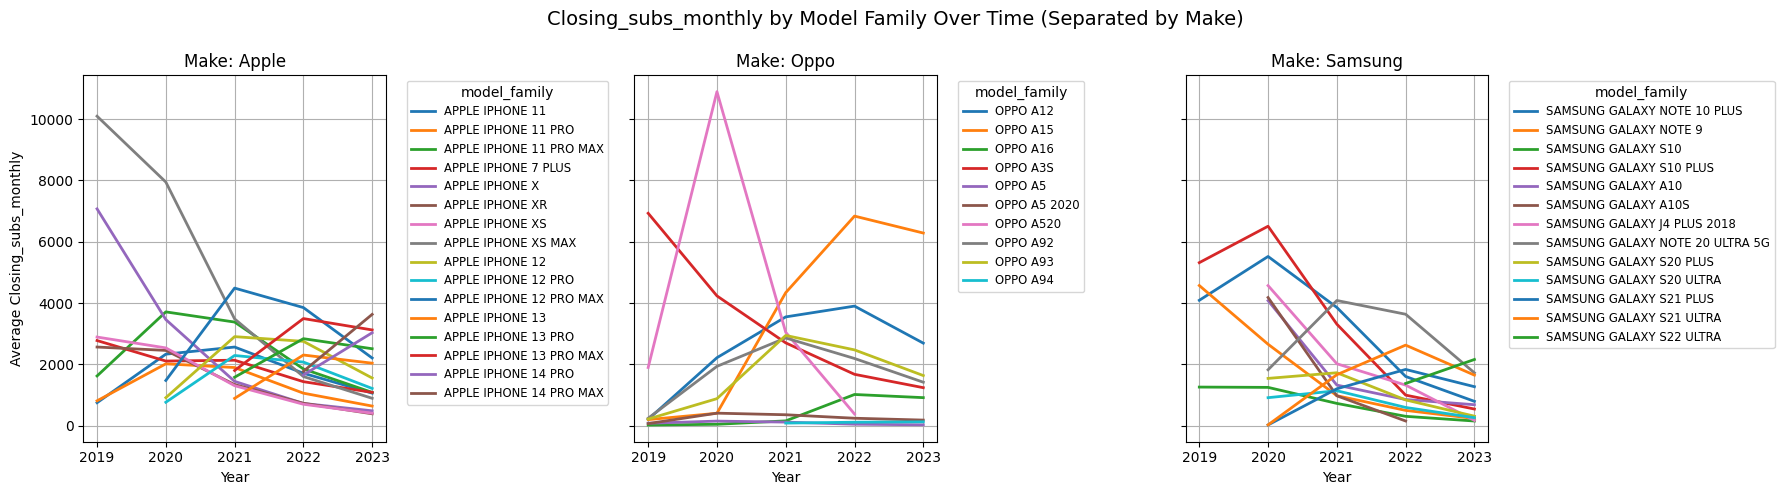

In [19]:
# Group data by 'year', 'make', and 'model_family', and calculate the average closing_subs_monthly
closing_subs_monthly_by_make_series_year = df.groupby(['make', 'year', 'model_family'])['closing_subs_monthly'].mean().reset_index()

# Get the unique makes in the dataset
unique_makes = closing_subs_monthly_by_make_series_year['make'].unique()

# Initialize subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5), sharey=True)
fig.suptitle('Closing_subs_monthly by Model Family Over Time (Separated by Make)', fontsize=14)

# Plot for each make
for i, make in enumerate(unique_makes):
    ax = axes[i]  # Select subplot
    make_data = closing_subs_monthly_by_make_series_year[closing_subs_monthly_by_make_series_year['make'] == make]
    
    # Plot each phone series for the current make
    for series in make_data['model_family'].unique():
        series_data = make_data[make_data['model_family'] == series]
        ax.plot(series_data['year'], series_data['closing_subs_monthly'], label=series, linewidth=2)
    
    # Add labels and title for the subplot
    ax.set_title(f"Make: {make}")
    ax.set_xlabel('Year')
    if i == 0:  # Add ylabel only for the first plot
        ax.set_ylabel('Average Closing_subs_monthly')
    ax.legend(title='model_family', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
    ax.grid(True)


plt.tight_layout()
plt.subplots_adjust(top=0.85) 
plt.show()

**_Observations_**

**Make: Apple**  
- The `closing_subs_monthly` for iPhone models shows mixed trends over time. For example, in **2019**, the closing subscriptions for **iPhone XS Max** and **iPhone X** declined, while subscriptions for later models like **iPhone 11 Pro Max**, **iPhone 12 Pro Max**, and **iPhone 13** increased. This highlights the shifting popularity of iPhones as newer models are released.  
- Similarly, in **2020**, the rising subscriptions for **iPhone 11**, **iPhone 12**, and **iPhone 12 Pro** coincided with a decline in subscriptions for older models such as **iPhone XR** and **iPhone X**, further emphasizing the trend toward newer devices.

**Make: Oppo**  
- From **2019 to 2020**, `closing_subs_monthly` for **Oppo A520** increased sharply, while demand for **Oppo A3S** declined. This suggests a shift in demand for newer Oppo devices during this period.  
- Between **2020 and 2022**, models such as **Oppo A12**, **A92**, and **A93** experienced increased demand, whereas subscriptions for **Oppo A520** and **A3S** continued to decline.  
- In **2022-2023**, there was an overall decline in `closing_subs_monthly` across most Oppo model families, indicating a potential drop in demand or market saturation.

**Make: Samsung**  
- From **2019 to 2020**, `closing_subs_monthly` increased for models such as **Samsung Galaxy S10 Plus** and **Galaxy Note 10 Plus**, while **Galaxy Note 9** experienced a decline. This indicates a shift in demand towards newer Samsung models.  
- Between **2020 and 2021**, trends were mixed: `closing_subs_monthly` decreased for **7 models**, while **6 models** either experienced growth or a slower rate of increase.


**_Key Insights_**

1. **Preference for Newer Models**  
   - Across all makes (Apple, Oppo, and Samsung), there is a clear trend of **declining subscriptions for older models** as **newer models are released**.  
   - For example:  
     - **Apple**: Decline in subscriptions for **iPhone XS Max** and **iPhone X** coinciding with increased subscriptions for **iPhone 11 Pro Max**, **iPhone 12 Pro Max**, and **iPhone 13**.  
     - **Samsung**: Decrease in demand for **Galaxy Note 9** as newer models like **Galaxy S10 Plus** and **Galaxy Note 10 Plus** gained popularity.  
     - **Oppo**: Drop in demand for **Oppo A3S** while newer models like **A520**, **A12**, and **A93** saw increased adoption.

2. **Shifts in Model-Specific Demand**  
   - Certain phone models experienced sharp increases in demand during specific periods but also sharp declines afterward, suggesting **short-lived popularity**:  
     - **Oppo A520** saw a spike from **2019 to 2020**, but subscriptions declined post-2020.  
     - **Samsung Galaxy Note 10 Plus** and **Galaxy S10 Plus** saw demand rise in **2019-2020** but faced mixed trends afterward.  

3. **Signs of Market Saturation or Declining Demand**  
   - In the later years (**2022-2023**), **most Oppo models** experienced a decline in `closing_subs_monthly`, suggesting:  
     - Possible **market saturation** for existing models.  
     - A **slowdown in consumer demand** for Oppo devices.  
   - Similar trends may be observed for **Apple** and **Samsung** with specific models seeing slower subscription growth or decline over time.

<br>

---

## Plot 6: closing_subs_monthly VS claims

In [20]:
agg_df = df.groupby(['phone_series', 'claims'], as_index=False)['closing_subs_monthly'].mean()
agg_df.select_dtypes(include='number').corr()

,claims,closing_subs_monthly
claims,1.000000,0.809724
closing_subs_monthly,0.809724,1.000000


**_Observations_**  

The correlation coefficient between `closing_subs_monthly` (average closing subscriptions) and `claims` is 0.8097. This indicates a strong positive correlation between the two variables.

Interpretation of the Correlation:
A positive correlation of 0.8097 suggests that as the number of `claims` increases, the `closing_subs_monthly` also tends to increase. This could imply that higher `claims` might be associated with greater closing subscriptions, potentially indicating a relationship where more claims lead to an increase in the number of users or subscriptions being closed.

<br>

---

<br>

## Future Work
Areas of further analysis:
1. **Impact of Model Age on Claims**: Does the age of a phone number correlates with the number of claims?
2. **Model Age Distribution**: What models are new, what models are old?